In [1]:
import os
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib  as mpl
import matplotlib.pyplot as plt
import os, shutil, glob
import re, math
import seaborn as sns; sns.set(color_codes=False)

In [2]:
Colors = [ 'darkorange', 'cornflowerblue',
                'forestgreen', 'red', 'yellow']
Alpha = 0.5 
LineWidth = 0.5
yRange = [-5.5, 6] # range for ploting scaled data (in SD)
FigureSize = (15, 10)
Resolution = 300
FontSize = 9
Flags = []

### Select one or several input files or folders

In [3]:
BaseDir = '/cpp-work/'
sorted(os.listdir(BaseDir))

['.DS_Store',
 'cpplugins',
 'input',
 'logs',
 'notebooks',
 'old_input',
 'old_output',
 'output',
 'pipelines',
 'results']

In [4]:
InputPath = ["results/RMS-e02-v01-P014561-RH30-48h/1298/830","results/RMS-e02-v01-P014561-RD-48h/1297/829/","results/RMS-e02-v01-P014562-RD18-48h/1296/828/","results/RMS-e02-v01-P014562-RH30-48h/1295/827/","results/RMS-e02-v01-P014563-RD18-48h/1294/826/","results/RMS-e02-v01-P014563-RH30-48h/1293/825/","results/RMS-e02-v01-P014564-CW9019-48h/1292/824/","results/RMS-e02-v01-P014564-RD-48h/1291/823/","results/RMS-e01-v03-plate1-RH30-48h/1263/744/","results/RMS-e01-v03-plate1-RD18-48h/1264/745/","results/RMS-e01-v03-plate2-RD-48h/1258/746/","results/RMS-e01-v03-plate2-CW9019-48h/1257/749/"]

In [5]:
InputFiles = []
NameContains = input("Enter part of name(s) of the file(s) of image quality data: ") # MRC5
for Path in InputPath:
    for f in (f for f in os.listdir(BaseDir + Path) if ((NameContains in f) & ('qcRAW_images' in f))):
        InputFiles.append(Path + '/' + f)
print ('InputFiles: ' + str(InputFiles))
data =  pd.DataFrame()
ReadingFile = 0
for file in sorted(InputFiles):
    DataFromOneFile =  pd.read_csv(BaseDir + file, sep=",", low_memory=False)
    ReadingFile += 1
    data = data.append(DataFromOneFile.iloc[:,:], ignore_index=True)
print ('Dataframe contains %s columns and %s rows.' %(data.shape[1], data.shape[0]))

Enter part of name(s) of the file(s) of image quality data:  RMS


InputFiles: ['results/RMS-e02-v01-P014561-RH30-48h/1298/830/qcRAW_images_RMS-e02-v01-P014561-RH30-48h.csv', 'results/RMS-e02-v01-P014561-RD-48h/1297/829//qcRAW_images_RMS-e02-v01-P014561-RD-48h.csv', 'results/RMS-e02-v01-P014562-RD18-48h/1296/828//qcRAW_images_RMS-e02-v01-P014562-RD18-48h.csv', 'results/RMS-e02-v01-P014562-RH30-48h/1295/827//qcRAW_images_RMS-e02-v01-P014562-RH30-48h.csv', 'results/RMS-e02-v01-P014563-RD18-48h/1294/826//qcRAW_images_RMS-e02-v01-P014563-RD18-48h.csv', 'results/RMS-e02-v01-P014563-RH30-48h/1293/825//qcRAW_images_RMS-e02-v01-P014563-RH30-48h.csv', 'results/RMS-e02-v01-P014564-CW9019-48h/1292/824//qcRAW_images_RMS-e02-v01-P014564-CW9019-48h.csv', 'results/RMS-e02-v01-P014564-RD-48h/1291/823//qcRAW_images_RMS-e02-v01-P014564-RD-48h.csv', 'results/RMS-e01-v03-plate1-RH30-48h/1263/744//qcRAW_images_RMS-e01-v03-plate1-RH30-48h.csv', 'results/RMS-e01-v03-plate1-RD18-48h/1264/745//qcRAW_images_RMS-e01-v03-plate1-RD18-48h.csv', 'results/RMS-e01-v03-plate2-RD-48h/1

In [6]:
xtickdf = data.drop_duplicates(subset='Metadata_Barcode', inplace= False, ignore_index=False).copy()

In [7]:
try: 
    PlateNames = sorted(list(set(data['Metadata_Barcode'])))
    print('Number of plates: %s' %(len(PlateNames)))
    print(PlateNames)
    data.sort_values(['Metadata_Barcode','Metadata_Well', 'Metadata_Site'], inplace = True)
    data.reset_index(drop=True, inplace = True)
except:
    print('Plate names not specified')
    PlateNames = []
Wells = sorted(list(set(data['Metadata_Well'])))
NrOfWells = len(Wells)
print('Number of wells: %s' %(NrOfWells))
Rows = sorted(list(set([w[0] for w in Wells])))
print(*Rows)
NrOfRows = len(Rows)
Columns = sorted(list(set([w[1:] for w in Wells])))
NrOfColumns = len(Columns)
print(*Columns)
Sites = sorted(list(set(data['Metadata_Site'])))
NrOfSites = len(Sites)
print('Number of sites: %s' %(NrOfSites))


Number of plates: 12
['RMS-e01-v03-plate1-RD18-48h', 'RMS-e01-v03-plate1-RH30-48h', 'RMS-e01-v03-plate2-CW9019-48h', 'RMS-e01-v03-plate2-RD-48h', 'RMS-e02-v01-P014561-RD-48h', 'RMS-e02-v01-P014561-RH30-48h', 'RMS-e02-v01-P014562-RD18-48h', 'RMS-e02-v01-P014562-RH30-48h', 'RMS-e02-v01-P014563-RD18-48h', 'RMS-e02-v01-P014563-RH30-48h', 'RMS-e02-v01-P014564-CW9019-48h', 'RMS-e02-v01-P014564-RD-48h']
Number of wells: 384
A B C D E F G H I J K L M N O P
01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
Number of sites: 9


### Specify path for output

In [8]:
PathToPlots = input("Enter path for output: ") # ./QC_results/
if not os.path.exists(PathToPlots): 
    os.makedirs(PathToPlots)
PathToPlots

Enter path for output:  RMS_QC


'RMS_QC'

### Select measures

In [9]:
ImageQuality = [s for s in data.columns if "ImageQuality_" in s]
ImageQualityModule = [s.replace('ImageQuality_', '') for s in ImageQuality]
ImageQualityMeasures = sorted(list(set([re.sub('_.*', '', s) for s in ImageQualityModule])))
CountMeasures = len(ImageQualityMeasures)
print('ImageQuality module has measured '
      + str(CountMeasures) + ' parameters: ' + ', '.join(ImageQualityMeasures))

ImageQuality module has measured 22 parameters: Correlation, FocusScore, LocalFocusScore, MADIntensity, MaxIntensity, MeanIntensity, MedianIntensity, MinIntensity, PercentMaximal, PercentMinimal, PowerLogLogSlope, Scaling, StdIntensity, ThresholdBackground, ThresholdKapur, ThresholdMCT, ThresholdMoG, ThresholdOtsu, ThresholdRidlerCalvard, ThresholdRobustBackground, TotalArea, TotalIntensity


In [10]:
NotSoUseful = ['TotalArea', 'Scaling', 'TotalIntensity', 'Correlation', 'PercentMinimal'
               ,'LocalFocusScore', 'MinIntensity', 'MedianIntensity', 'MADIntensity'
               ,'ThresholdMoG'
               ,'ThresholdBackground'
               ,'ThresholdKapur'
               ,'ThresholdMCT'
               ,'ThresholdOtsu'
               ,'ThresholdRidlerCalvard'
               ,'ThresholdRobustBackground'                      
               ]
for u in NotSoUseful:
    ImageQualityMeasures.remove(u)
CountMeasures = len(ImageQualityMeasures)
print('This notebook will use '+ str(CountMeasures) + ' measures: ' + 
      ', '.join(ImageQualityMeasures))

DataFrameDictionary = {}
for z in ImageQualityMeasures:
    parameter = [s for s in ImageQuality if ('_' + z) in s]
    DataFrameDictionary[z]=data[parameter]
DataFrameList = sorted(list(DataFrameDictionary.keys()))

This notebook will use 6 measures: FocusScore, MaxIntensity, MeanIntensity, PercentMaximal, PowerLogLogSlope, StdIntensity


### Create lineplots

In [11]:
nrSubplots=len(DataFrameList)
# old: ChannelNames = [ 'Hoechst', 'Mito', 'Phalloid.', 'Syto', 'Concan.']
# new:
ChannelNames = []
for c in list(DataFrameDictionary[DataFrameList[0]].columns):
    ChannelNames.append(re.sub('.*_', '', c))
ChannelNames

['CONC', 'HOECHST', 'MITO', 'PHAandWGA', 'SYTO']

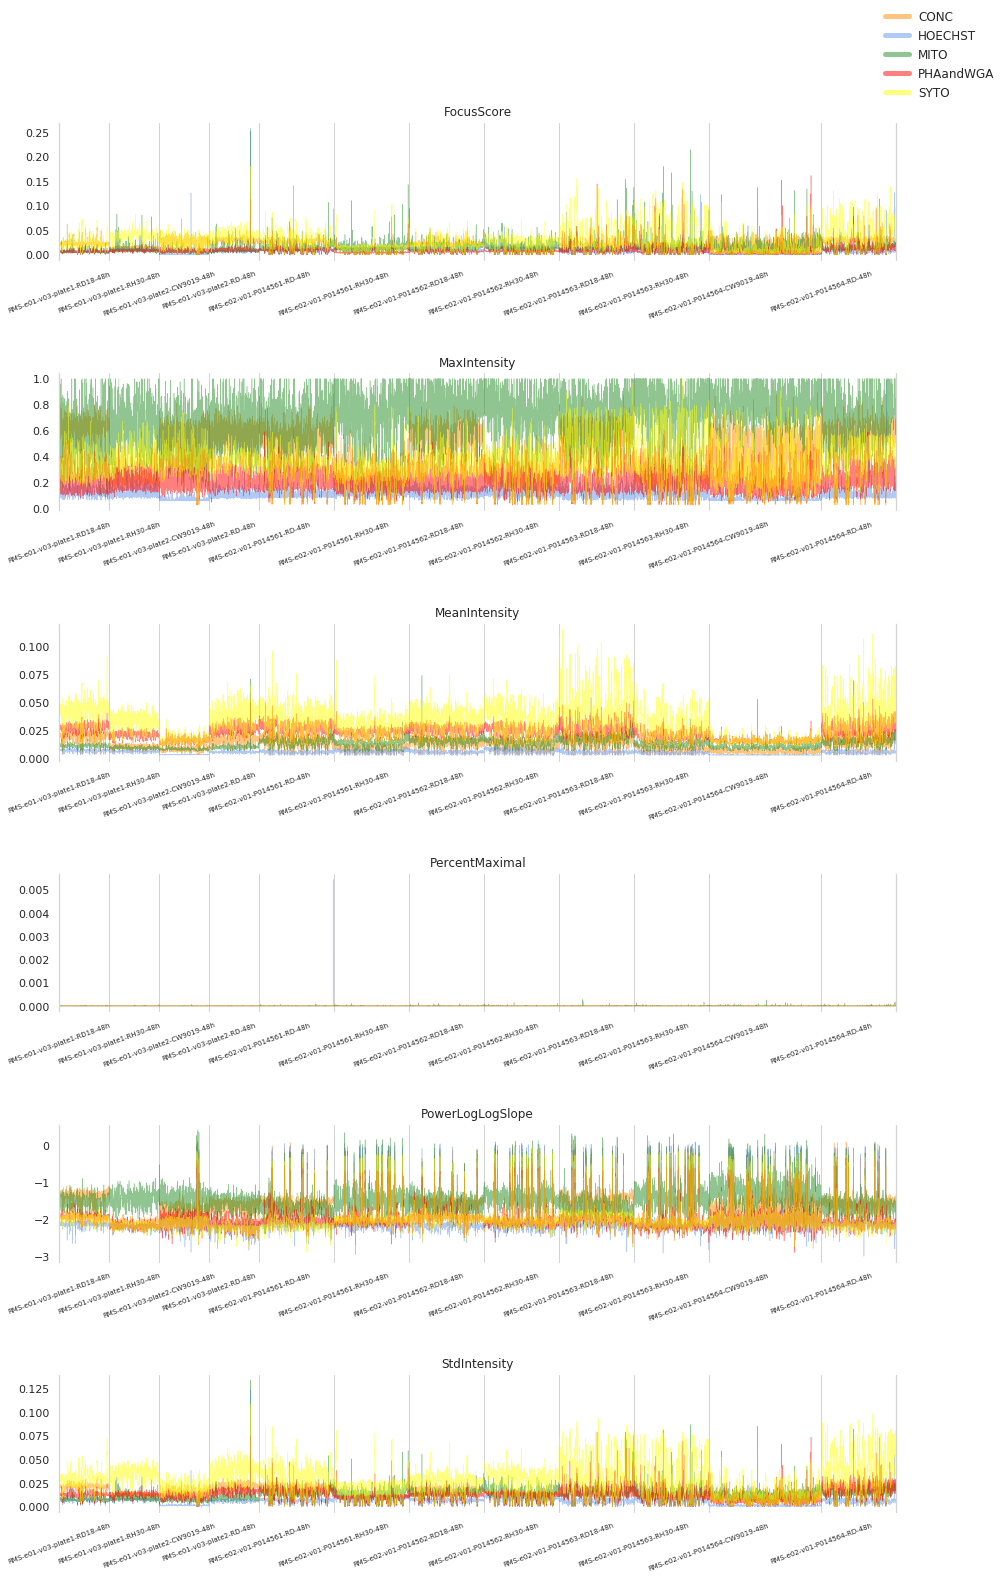

In [12]:
fig = plt.figure(figsize = (FigureSize[0],4*nrSubplots))
#fig.suptitle(NameContains,fontsize = FontSize*1.2, x = 0.2)

for x in range(0, nrSubplots):
    CurrentDataFrame = DataFrameDictionary.get(DataFrameList[x])
    CurrentDFName = ImageQualityMeasures[x]
    #print(CurrentDataFrame.columns)

    ax = fig.add_subplot(nrSubplots, 1, x+1)
    ax.set_title(CurrentDFName, fontsize = 12)
    ax.set_facecolor('w')
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    ax.spines['left'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    ax.set_xlim([0, len(CurrentDataFrame.index)])
    #ax.set_ylim([0, 1])
    myplot = CurrentDataFrame.plot(kind='line', linewidth=0.5, alpha=Alpha, ax=ax, legend=None, color = Colors)
    xticks = xtickdf.index
    ax.set_xticks(xticks)
    ax.set_xticklabels(data['Metadata_Barcode'].iloc[xtickdf.index])
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FontSize -2) 
        tick.label.set_rotation(20)
    # ax.set_yticks()
    ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
    ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='', linewidth=0)
    #ax.tick_params(axis='x', labelbottom=False)
plt.subplots_adjust(top=0.93, hspace=0.80)
leg = fig.legend(ChannelNames, fontsize = 12, frameon=False)
for line in leg.get_lines():
    line.set_linewidth(5.0)
plt.savefig('{}/Unscaled.png'.format(PathToPlots), dpi=Resolution)
plt.show()

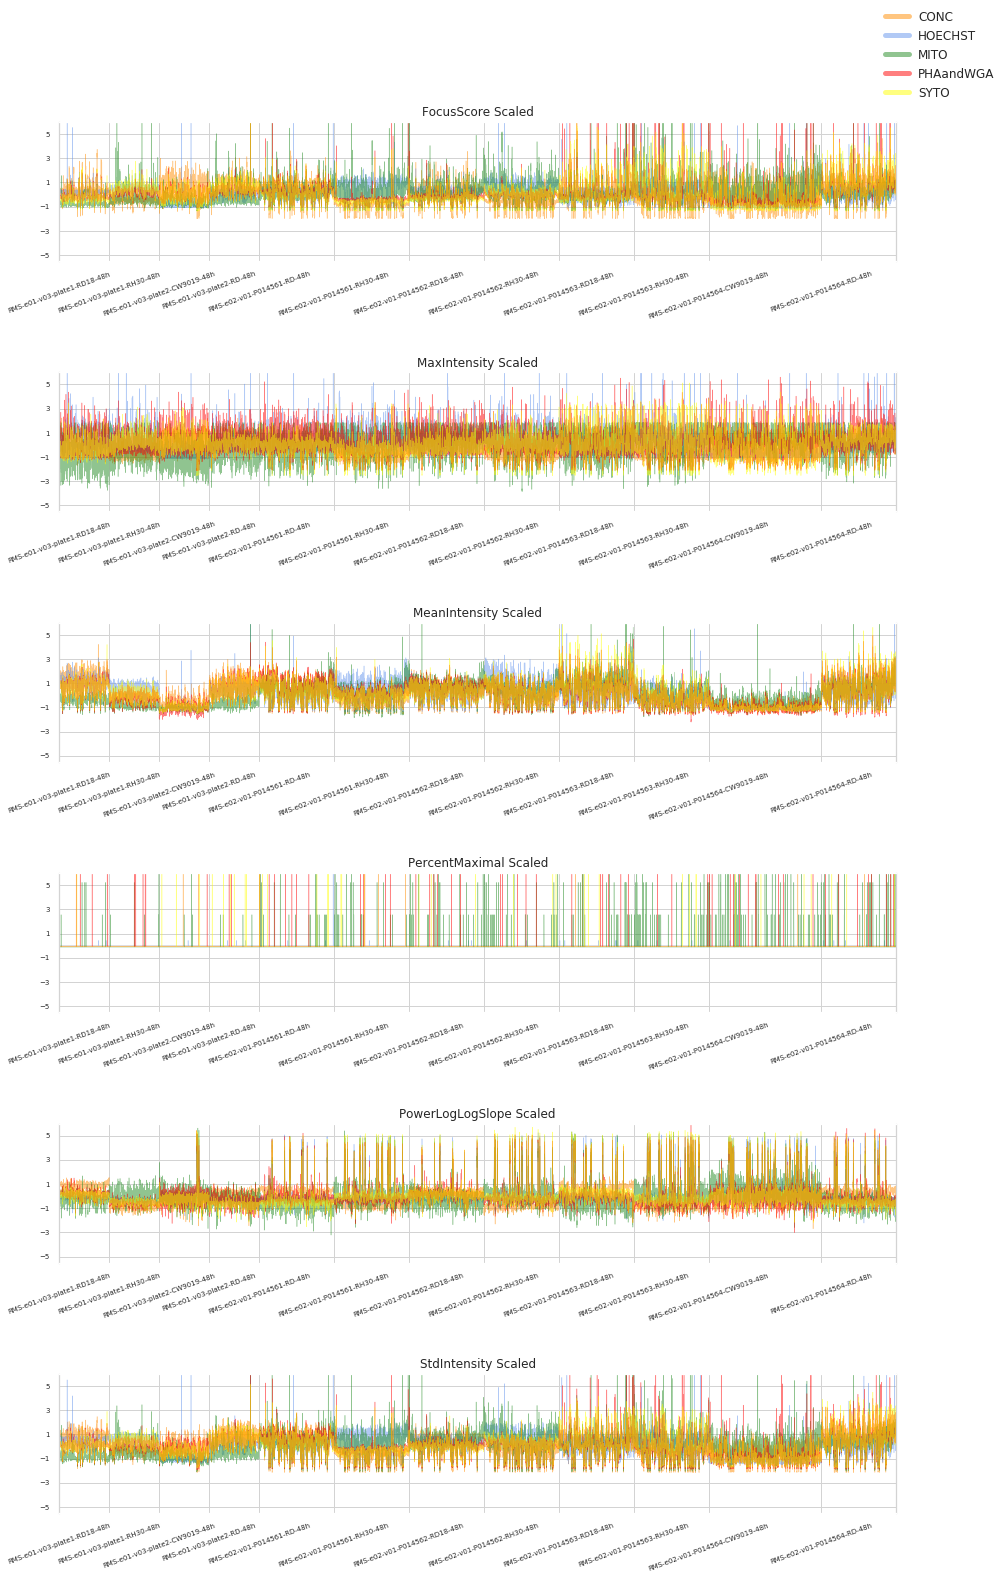

In [13]:
fig = plt.figure(figsize = (FigureSize[0],4*nrSubplots))
#fig.suptitle(NameContains,fontsize = FontSize*1.2, x = 0.2)
for x in range(0, nrSubplots):
    CurrentDataFrame = DataFrameDictionary.get(DataFrameList[x])
    CurrentDFName = ImageQualityMeasures[x]
    x_unscaled = CurrentDataFrame.values #returns a numpy array
    x_scaled = StandardScaler().fit_transform(x_unscaled)
    CurrentDataFrameScaled = pd.DataFrame(x_scaled, columns = ChannelNames)

    ax = fig.add_subplot(nrSubplots, 1, x+1)
    ax.set_title(CurrentDFName + ' Scaled', fontsize = 12)
    ax.set_facecolor('w')
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    ax.spines['left'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    ax.set_xlim([0, len(CurrentDataFrame.index)])
    ax.set_ylim(yRange[0], yRange[1])
    myplot = CurrentDataFrameScaled.plot(kind='line', linewidth=0.5, alpha=0.5, ax=ax, legend=None, color = Colors)
    xticks = xtickdf.index
    ax.set_xticks(xticks)
    ax.set_xticklabels(data['Metadata_Barcode'].iloc[xtickdf.index])
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FontSize -2) 
        tick.label.set_rotation(20)
    ax.set_yticks(np.arange(start = math.ceil(yRange[0]), stop = yRange[1], step = 2))
    ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
    ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
    #ax.tick_params(axis='x', labelbottom=False)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FontSize -2)
plt.subplots_adjust(top=0.93, hspace=0.80)
leg = fig.legend(ChannelNames, fontsize = 12, frameon=False)
for line in leg.get_lines():
    line.set_linewidth(5.0)
plt.savefig('{}/Scaled.png'.format(PathToPlots), dpi=Resolution)
plt.show()

### Create flags for PowerLogLogSlope (> -2.3)

In [14]:
for i, item in enumerate(DataFrameList):
        print(i, item)

p = input('Enter an integer from 0 to %s:' %(len(DataFrameList)-1))
try:
    p = int(p)
except:
    p=4
CurrentDataFrame = DataFrameDictionary.get(DataFrameList[p])
CurrentDFName = ImageQualityMeasures[p]
CurrentDataFrame.describe(percentiles =  [.25, .5, .75, .90, .99]).iloc[1:]

0 FocusScore
1 MaxIntensity
2 MeanIntensity
3 PercentMaximal
4 PowerLogLogSlope
5 StdIntensity


Enter an integer from 0 to 5: 4


,ImageQuality_PowerLogLogSlope_CONC,ImageQuality_PowerLogLogSlope_HOECHST,ImageQuality_PowerLogLogSlope_MITO,ImageQuality_PowerLogLogSlope_PHAandWGA,ImageQuality_PowerLogLogSlope_SYTO
mean,-1.686935,-2.049011,-1.438107,-1.982050,-1.990131
std,0.398848,0.416050,0.330924,0.295410,0.339926
min,-2.764825,-2.976683,-2.504824,-2.874479,-2.856390
25%,-1.998629,-2.179877,-1.634048,-2.133797,-2.148887
50%,-1.707176,-2.131567,-1.485202,-2.041088,-2.051661
75%,-1.486106,-2.085736,-1.317800,-1.925776,-1.943973
90%,-1.323289,-1.982976,-1.108538,-1.795419,-1.837430
99%,-0.172894,-0.049562,-0.109280,-0.659502,-0.321691
max,0.118028,0.134042,0.423422,-0.204088,-0.050347


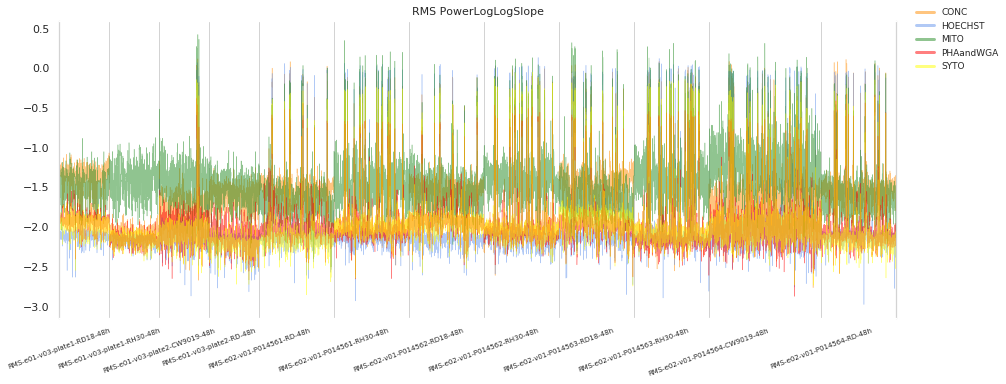

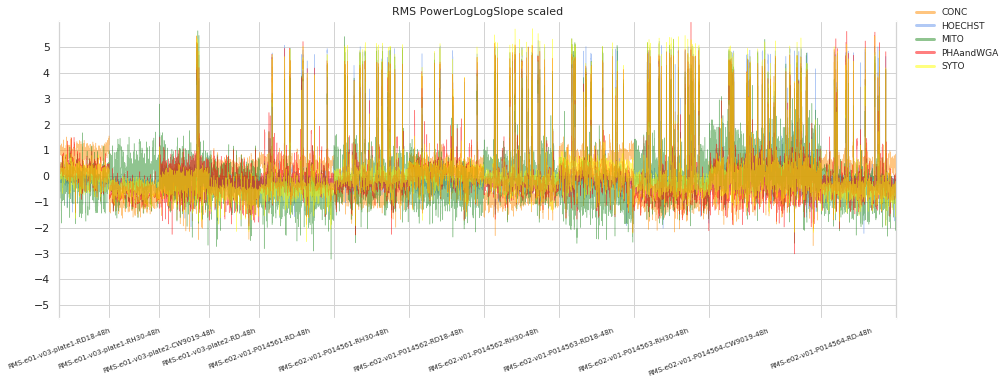

In [15]:
# PLOT RAW DATA

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)
ax.set_title(NameContains + ' ' + CurrentDFName, fontsize = FontSize + 2)
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.set_xlim([0, len(CurrentDataFrame.index)])
ax.set_facecolor('w')
myplot = CurrentDataFrame.plot(kind='line', linewidth=LineWidth, alpha=Alpha, ax=ax, legend=None, color = Colors)
xticks = xtickdf.index
ax.set_xticks(xticks)
ax.set_xticklabels(data['Metadata_Barcode'].iloc[xtickdf.index])
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FontSize -2) 
    tick.label.set_rotation(20)
ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='', linewidth=0)
ax.tick_params(axis='x', labelbottom=True, color='lightgrey')
plt.subplots_adjust(top=0.95, hspace=0.40)
leg = fig.legend(ChannelNames, fontsize = FontSize,frameon=False)
for line in leg.get_lines():
    line.set_linewidth(3.0)
plt.savefig(PathToPlots + '/' +CurrentDFName + '_Unscaled.png', dpi = Resolution)
plt.show()

# PLOT SCALED DATA
x_unscaled = CurrentDataFrame.values 
x_scaled = StandardScaler().fit_transform(x_unscaled)
CurrentDataFrameScaled = pd.DataFrame(x_scaled, columns = ChannelNames)

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)
ax.set_title(NameContains + ' ' + CurrentDFName + ' scaled', fontsize = FontSize + 2)
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.set_xlim([0, len(CurrentDataFrame.index)])
ax.set_facecolor('w')

myplot = CurrentDataFrameScaled.plot(kind='line', linewidth=LineWidth, alpha=Alpha, ax=ax, legend=None, color = Colors)
xticks = xticks = xtickdf.index
ax.set_xticks(xticks)
ax.set_xticklabels(data['Metadata_Barcode'].iloc[xtickdf.index])
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FontSize -2) 
    tick.label.set_rotation(20)
ax.set_ylim(yRange)
ax.set_yticks(np.arange(start = math.ceil(yRange[0]), stop = yRange[1]))
ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
ax.tick_params(axis='x', labelbottom=True, color='lightgrey')
plt.subplots_adjust(top=0.95, hspace=0.40)
leg = fig.legend(ChannelNames, fontsize = FontSize,frameon=False)
for line in leg.get_lines():
    line.set_linewidth(3.0)
plt.savefig(PathToPlots + '/' + CurrentDFName + '_Scaled.png', dpi=Resolution)
plt.show() 

In [16]:
LowerLimit = -2.3 
UpperLimit = float('inf')
NewFlagRaw = 'Outlier' + '_' + DataFrameList[p] + '_' + str(LowerLimit) + '_' + str (UpperLimit)
Flags.append(NewFlagRaw)
print('Outliers will be flagged in column: ' + NewFlagRaw)
data[NewFlagRaw] = 0

Outliers will be flagged in column: Outlier_PowerLogLogSlope_-2.3_inf


In [17]:
CurrentDataFrameOutliersMetadata = data[(CurrentDataFrame.values > UpperLimit).
                                any(1) | (CurrentDataFrame.values < LowerLimit).
                                        any(1)][['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site']]
CurrentDataFrameOutliersValues = CurrentDataFrame[(CurrentDataFrame.values > UpperLimit).
                                any(1) | (CurrentDataFrame.values < LowerLimit).
                                any(1)]
CurrentDataFrameOutliers = CurrentDataFrameOutliersMetadata.merge(CurrentDataFrameOutliersValues,
                                                                  left_index=True, right_index=True)
print('%s images flagged in column %s' %(CurrentDataFrameOutliers.shape[0], NewFlagRaw))
CurrentDataFrameOutliers

1021 images flagged in column Outlier_PowerLogLogSlope_-2.3_inf


,Metadata_Barcode,Metadata_Well,Metadata_Site,ImageQuality_PowerLogLogSlope_CONC,ImageQuality_PowerLogLogSlope_HOECHST,ImageQuality_PowerLogLogSlope_MITO,ImageQuality_PowerLogLogSlope_PHAandWGA,ImageQuality_PowerLogLogSlope_SYTO
122,RMS-e01-v03-plate1-RD18-48h,C19,3,-1.797484,-2.548669,-1.848456,-2.042417,-1.980221
161,RMS-e01-v03-plate1-RD18-48h,D17,2,-1.963966,-2.394856,-1.732880,-2.185105,-2.285999
207,RMS-e01-v03-plate1-RD18-48h,E16,4,-1.293188,-2.633595,-1.526288,-1.879426,-1.959346
251,RMS-e01-v03-plate1-RD18-48h,F15,4,-1.975160,-2.633008,-2.052125,-2.406111,-2.548946
340,RMS-e01-v03-plate1-RD18-48h,H14,1,-1.980568,-2.328750,-1.976064,-2.252298,-2.229292
...,...,...,...,...,...,...,...,...
12824,RMS-e02-v01-P014564-RD-48h,P18,3,-1.676292,-2.218234,-1.592726,-2.204644,-2.340520
12830,RMS-e02-v01-P014564-RD-48h,P19,3,-1.645896,-2.250677,-1.786260,-2.189559,-2.358076
12833,RMS-e02-v01-P014564-RD-48h,P19,6,-1.539747,-2.411190,-1.771024,-2.157198,-2.242111
12840,RMS-e02-v01-P014564-RD-48h,P21,1,-1.551980,-2.775243,-1.662670,-2.145749,-2.158227


In [18]:
Outliers = CurrentDataFrameOutliers.index.values.tolist()
data.loc[Outliers,NewFlagRaw] = 1
print('%s images flagged in column %s' %(CurrentDataFrameOutliers.shape[0], NewFlagRaw))

1021 images flagged in column Outlier_PowerLogLogSlope_-2.3_inf


### Create flags for images deviating more than 6 SD

In [19]:
LowerLimitScaled = - 6 #float('-inf')
UpperLimitScaled = 6 #float('inf')

In [20]:
for p in range(0, len(DataFrameList)):
    CurrentDataFrame = DataFrameDictionary.get(DataFrameList[p])
    CurrentDFName = ImageQualityMeasures[p]
    
    x_unscaled = CurrentDataFrame.values 
    x_scaled = StandardScaler().fit_transform(x_unscaled)
    CurrentDataFrameScaled = pd.DataFrame(x_scaled, columns = ChannelNames)

    NewFlagSc = 'OutlierScaled' + '_' + DataFrameList[p] + '_' + str(LowerLimitScaled) + '_' + str (UpperLimitScaled)
    Flags.append(NewFlagSc)
    data[NewFlagSc] = 0

    CurrentDataFrameOutliersMetadata = data[(CurrentDataFrameScaled.values >= UpperLimitScaled).
                                    any(1) | (CurrentDataFrameScaled.values <= LowerLimitScaled).
                                    any(1)][['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site']]
    CurrentDataFrameOutliersValues = CurrentDataFrameScaled[(CurrentDataFrameScaled.values >= UpperLimitScaled).
                                    any(1) | (CurrentDataFrameScaled.values <= LowerLimitScaled).
                                    any(1)]
    CurrentDataFrameScaledOutliers = CurrentDataFrameOutliersMetadata.merge(CurrentDataFrameOutliersValues,
                                                                      left_index=True, right_index=True)

    Outliers = CurrentDataFrameScaledOutliers.index.values.tolist()
    data.loc[Outliers,NewFlagSc] = 1

In [24]:
data['Total'] = data[Flags].max(axis = 1)
Flags.append('Total')
print(data[Flags].sum())


data.to_csv(PathToPlots + '/{}_Flagged.csv'.format(NameContains), sep = ',')
print('\n{} images flagged in file {}/Flagged.csv'.format(data.Total.sum(), PathToPlots))


Outlier_PowerLogLogSlope_-2.3_inf      1021
OutlierScaled_FocusScore_-6_6            91
OutlierScaled_MaxIntensity_-6_6          31
OutlierScaled_MeanIntensity_-6_6          9
OutlierScaled_PercentMaximal_-6_6       170
OutlierScaled_PowerLogLogSlope_-6_6       1
OutlierScaled_StdIntensity_-6_6          46
Total                                  1222
Total                                  1222
Total                                  1222
Total                                  1222
dtype: int64

1222 images flagged in file RMS_QC/Flagged.csv
0.09499378109452736


In [32]:
flagged_percent = data.Total.sum()/data.shape[0] *100
flagged_percent = round(flagged_percent,2)
print('In total {}% of images were flagged'.format(flagged_percent))

In total 9.5% of images were flagged
